In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
import numpy as np

In [2]:
df= pd.read_csv('Comcast_telecom_complaints_data.csv')

In [3]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [5]:
df.shape

(2224, 11)

In [6]:
df['Status']=df['Status'].replace(['Pending','Solved'],['Open','Closed'])

C:\Users\Swaraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Swaraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Swaraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


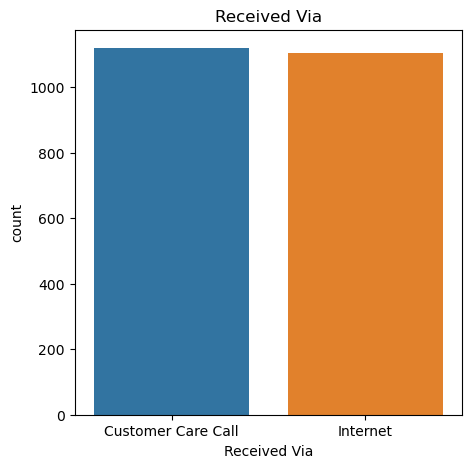

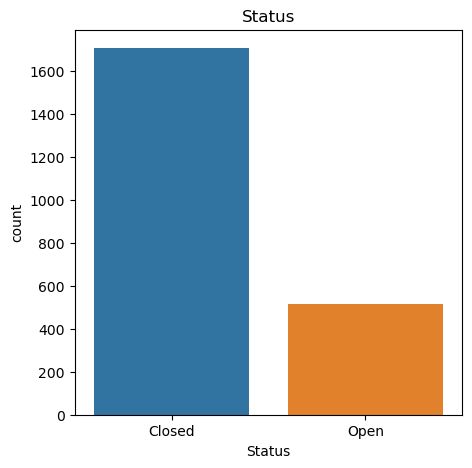

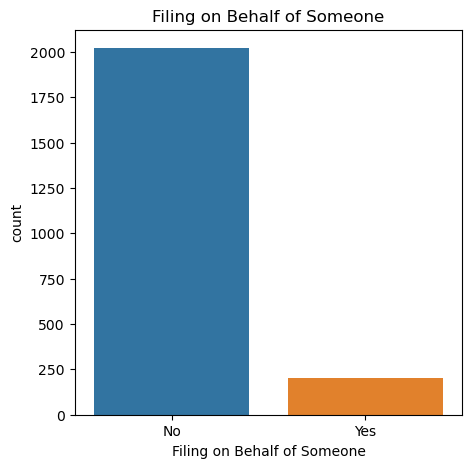

In [7]:
for f in ['Received Via','Status','Filing on Behalf of Someone']:
    plt.figure(figsize=(5,5))
    sns.countplot(df[f])
    plt.title(f)

Text(0.5, 1.0, 'State')

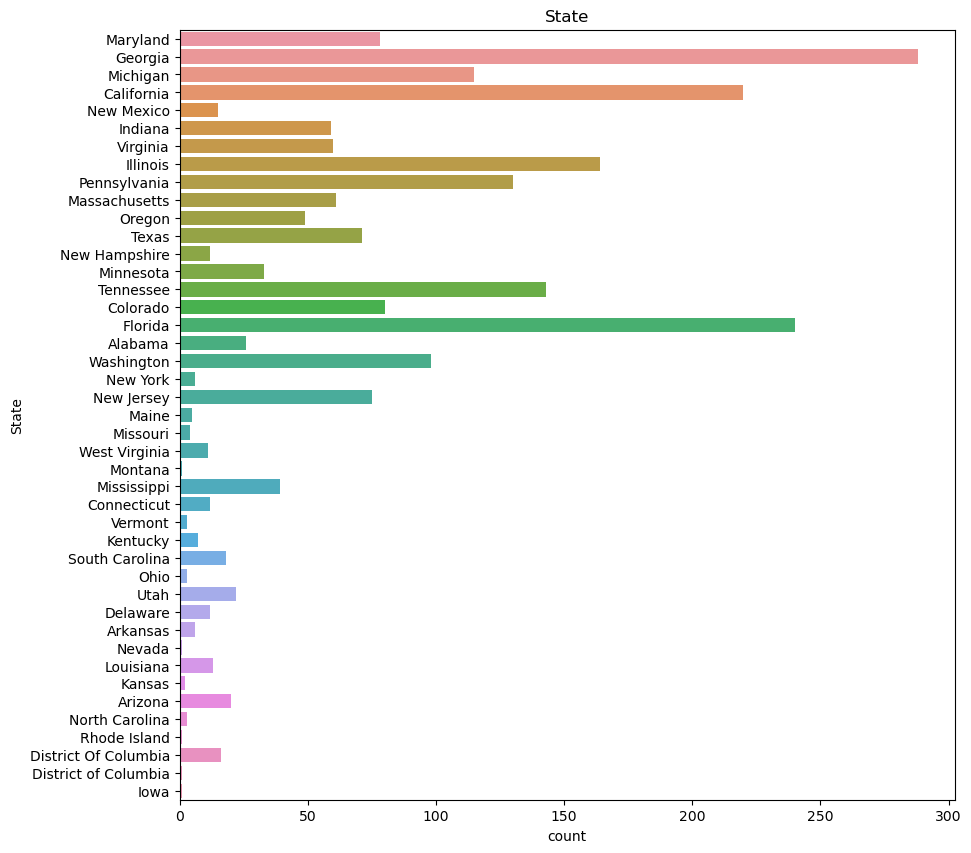

In [8]:
plt.figure(figsize=(10,10))
sns.countplot(y=df['State'])
plt.title('State')

In [20]:
df['City'].value_counts()

Atlanta         63
Chicago         47
Knoxville       36
Houston         33
Jacksonville    31
                ..
Howell           1
Hudsonville      1
Hughesville      1
Huston           1
Logan            1
Name: City, Length: 928, dtype: int64

In [9]:
a=df['Customer Complaint'].value_counts()

In [10]:
print(a)

Comcast                                          83
Comcast Internet                                 18
Comcast Data Cap                                 17
comcast                                          13
Comcast Billing                                  11
                                                 ..
Improper Billing and non resolution of issues     1
Deceptive trade                                   1
intermittent internet                             1
Internet Speed on Wireless Connection             1
Comcast, Ypsilanti MI Internet Speed              1
Name: Customer Complaint, Length: 1841, dtype: int64


In [11]:
writer = pd.ExcelWriter('your_file_name.xlsx', engine='xlsxwriter')

# Write dataframe to new sheet
a.to_excel(writer, sheet_name='AnotherSheet')

# Close the Pandas Excel writer and output the Excel file.
writer.save()


In [12]:
from sklearn import preprocessing

for f in ['Received Via','Status','Filing on Behalf of Someone']:
    label_encoder= preprocessing.LabelEncoder()
    df[f]=label_encoder.fit_transform(df[f])


In [13]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,0,Abingdon,Maryland,21009,0,0
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,1,Acworth,Georgia,30102,0,0
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,1,Acworth,Georgia,30101,0,1
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,1,Acworth,Georgia,30101,1,1
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,1,Acworth,Georgia,30101,0,0


In [14]:
import datetime


In [15]:
df['Date']=pd.to_datetime(df['Date'])
df['month']=df['Date'].dt.month
df['year']=df['Date'].dt.year

In [16]:

df.drop('Date_month_year',axis=1,inplace = True)
df.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,year
0,250635,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,0,Abingdon,Maryland,21009,0,0,4,2015
1,223441,Payment disappear - service got disconnected,2015-04-08,10:22:56 AM,1,Acworth,Georgia,30102,0,0,4,2015
2,242732,Speed and Service,2015-04-18,9:55:47 AM,1,Acworth,Georgia,30101,0,1,4,2015
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,11:59:35 AM,1,Acworth,Georgia,30101,1,1,5,2015
4,307175,Comcast not working and no service to boot,2015-05-26,1:25:26 PM,1,Acworth,Georgia,30101,0,0,5,2015


C:\Users\Swaraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

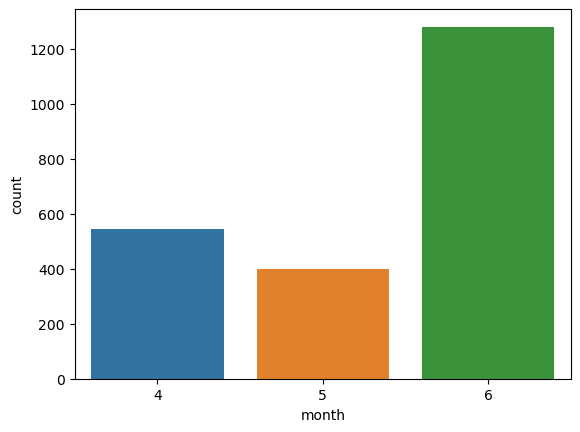

In [17]:
sns.countplot(df['month'])

maximum complaints are in the month of june.
maximum complaints are from state georgia.
maximum complaints from city Atlanta.
maximum complaints are filed by customer themselves.
maximum complaints are closed.